In [1]:
import torch
import numpy as np
from TruncatedNormal import TruncatedNormal

In [2]:
from scipy.stats import truncnorm
loc, scale, a, b = 1., 2., 1., 2.
tn_pt = TruncatedNormal(loc, scale, a, b)
mean_pt, var_pt = tn_pt.mean.item(), tn_pt.variance.item()
alpha, beta = (a - loc) / scale, (b - loc) / scale
mean_sp, var_sp = truncnorm.stats(alpha, beta, loc=loc, scale=scale, moments='mv')
print('mean', mean_pt, mean_sp)
print('var', var_pt, var_sp)
print('cdf', tn_pt.cdf(1.4).item(), truncnorm.cdf(1.4, alpha, beta, loc=loc, scale=scale))
print('icdf', tn_pt.icdf(0.333).item(), truncnorm.ppf(0.333, alpha, beta, loc=loc, scale=scale))
print('logpdf', tn_pt.log_prob(1.5).item(), truncnorm.logpdf(1.5, alpha, beta, loc=loc, scale=scale))
print('entropy', tn_pt.entropy.item(), truncnorm.entropy(alpha, beta, loc=loc, scale=scale))

mean 1.4896726608276367 1.489672527191059
var 0.08257712423801422 0.08257743451756827
cdf 0.41396990418434143 0.41396997046679446
icdf 1.3210030794143677 1.321003099849791
logpdf 0.009727835655212402 0.009727800490949678
entropy -0.0006833076477050781 -0.0006832231905438135


In [29]:
tn_pt = TruncatedNormal(0., .75, -1., 1.)

In [32]:
samples = tn_pt.rsample([100000])
samples.requires_grad = True

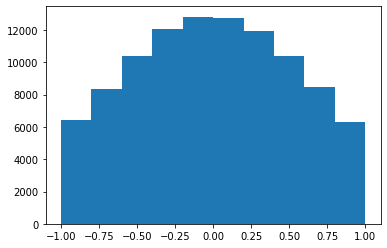

In [34]:
import matplotlib.pyplot as plt
plt.hist(samples.detach().numpy())
plt.show()

In [ ]:
def parameterized_truncated_normal(uniform, mu, sigma, a, b):
    normal = torch.distributions.normal.Normal(0, 1)

    alpha = (a - mu) / sigma
    beta = (b - mu) / sigma

    alpha_normal_cdf = normal.cdf(alpha)
    p = alpha_normal_cdf + (normal.cdf(beta) - alpha_normal_cdf) * uniform

    p = p.numpy()
    one = np.array(1, dtype=p.dtype)
    epsilon = np.array(np.finfo(p.dtype).eps, dtype=p.dtype)
    v = np.clip(2 * p - 1, -one + epsilon, one - epsilon)
    x = mu + sigma * np.sqrt(2) * torch.erfinv(torch.from_numpy(v))
    x = torch.clamp(x, a, b)

    return x


def truncated_normal(uniform):
    return parameterized_truncated_normal(uniform, mu=0.0, sigma=1.0, a=-2, b=2)


def sample_truncated_normal(shape=()):
    return truncted_normal(torch.from_numpy(np.random.uniform(0, 1, shape)))